In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
PATH_PATIENT_IDS_1 = "data/data_to_split/severity_X_holdout_to_GWAS.csv"
PATH_PATIENT_IDS_2 = "data/data_to_split/severity_X_train_to_GWAS.csv"
PATH_TARGETS_1 = "data/data_to_split/severity_y_holdout_to_GWAS.csv"
PATH_TARGETS_2 = "data/data_to_split/severity_y_train_to_GWAS.csv"

PATH_TO_DATASET = "data/just_significant_snps_with_genotypes.csv"

NUMBER_OF_SAMPLES_IN_HOLDOUT = 243
TOTAL_NUMBER_OF_PATIENTS = 969
NEW_INDEX = range(NUMBER_OF_SAMPLES_IN_HOLDOUT, TOTAL_NUMBER_OF_PATIENTS)
RANDOM_SEED = 0

## Fixing the data

In [3]:
patient_ids_1_dataframe = pd.read_csv(PATH_PATIENT_IDS_1)
patient_ids_2_dataframe = pd.read_csv(PATH_PATIENT_IDS_2, )
targets_1 = pd.read_csv(PATH_TARGETS_1)
targets_2 = pd.read_csv(PATH_TARGETS_2)

In [4]:
patient_ids_2_dataframe.index = NEW_INDEX
targets_2.index = NEW_INDEX

In [5]:
all_ids_dataframe = pd.concat([patient_ids_1_dataframe, patient_ids_2_dataframe])
all_targets_dataframe = pd.concat([targets_1, targets_2])

## Data split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_ids_dataframe, all_targets_dataframe, test_size=0.3, random_state=RANDOM_SEED, stratify=all_targets_dataframe)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(678, 1)
(291, 1)
(678, 1)
(291, 1)


array([[<AxesSubplot:title={'center':'target_severity'}>]], dtype=object)

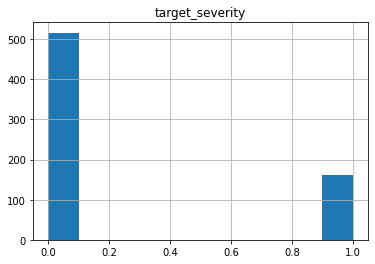

In [8]:
y_train.hist()

array([[<AxesSubplot:title={'center':'target_severity'}>]], dtype=object)

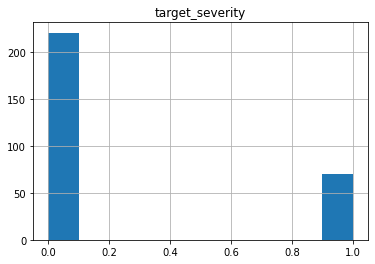

In [9]:
y_test.hist()

## Select data by ids

In [10]:
dataset = pd.read_csv(PATH_TO_DATASET, sep=";").set_index("SNP_ID").T

In [11]:
X_train_data = dataset[dataset.index.isin(X_train.patient_id)]
X_holdout_data = dataset[dataset.index.isin(X_test.patient_id)]

y_train_data = y_train
y_holdout_data = y_test

In [12]:
X_train_data.to_csv("data/data_after_split/X_train.csv")
X_holdout_data.to_csv("data/data_after_split/X_holdout.csv")
y_train_data.to_csv("data/data_after_split/y_train.csv", index=False)
y_holdout_data.to_csv("data/data_after_split/y_holdout.csv", index=False)